In [2]:
import sys
from hwr.data.generator import IAMSequence
from hwr.on.generator import IAMONSequence
from hwr.constants import ON, SPLIT, DECODER
from hwr.models.ONNET import ONNET
from hwr.decoding.mlf import mlf2txt
from hwr.data.generator import pad_2d
from hwr.models.metrics import character_error_rate
from hwr.decoding.ctc_decode import *
from hwr.decoding.trie_beam_search import *
from matplotlib import pyplot as plt
import numpy as np

In [3]:
model = ONNET(preload=True)

preloading model weights from /home/jasper/Desktop/fyp/HWR/hwr/../models/iamon/ONNET3v2/2019-03-24-00:22:37-a412/weights.h5


In [4]:
test_seq = IAMSequence(SPLIT.TEST, preprocess=6, npz=True, pred=True, inout_ratio=4)
eval_seq = IAMSequence(SPLIT.TEST, batch_size=100, preprocess=6, pred=True, npz=True, pad_to=(900, 225))

In [5]:
# 0.095 20bw google10k 0.4 backoff 
# 0.0851 best path
# 0.0823 vanilla beam search
# 0.0763 KN5 backoff tbs 20 bw, no lm
# 0.0728 KN5 backoff tbs 20 bw, prune 100
# 0.0734 KN5 backoff tbs 20 bw, prune 1000
# 0.0745 ...................... prune 10000
model.evaluate(eval_seq, decoder=DECODER.TRIE_BEAM_SEARCH)

39/39 [==============================] - 3s 78ms/step


100%|██████████| 3855/3855 [2:13:23<00:00,  2.13s/it]  


{'character_error_rate': 0.07448530534250647}

1/1 [==============================] - 1s 1s/step


100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


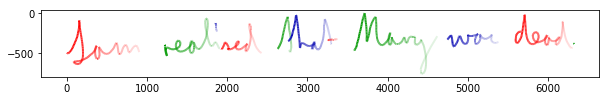

None
Grouth truth: 
Sam realised that Mary was dead . 
Prediction  : 
fam realised that May are dead . 
Character error rate: 0.14705882352941177
1/1 [==============================] - 0s 293ms/step


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


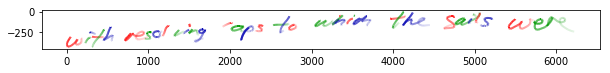

None
Grouth truth: 
with revolving caps to which the sails were 
Prediction  : 
ch esos sing taps to wit the salts were 
Character error rate: 0.3181818181818182
1/1 [==============================] - 0s 288ms/step


100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


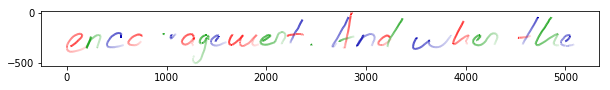

None
Grouth truth: 
encouragement . And when the 
Prediction  : 
encouragement . And when the 
Character error rate: 0.0
1/1 [==============================] - 0s 315ms/step


100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


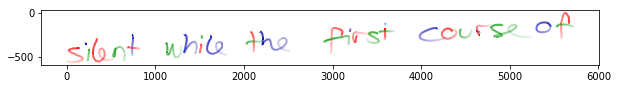

None
Grouth truth: 
silent while the first course of 
Prediction  : 
silent while the first course of 
Character error rate: 0.0
1/1 [==============================] - 0s 319ms/step


100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


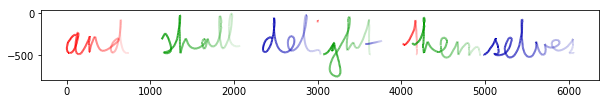

None
Grouth truth: 
and shall delight themselves 
Prediction  : 
and shall delight themselves 
Character error rate: 0.0
1/1 [==============================] - 0s 318ms/step


100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


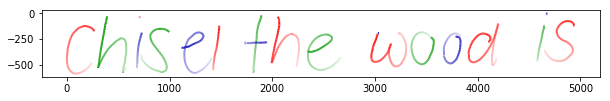

None
Grouth truth: 
chisel the wood is 
Prediction  : 
Chisel the word is 
Character error rate: 0.10526315789473684
1/1 [==============================] - 1s 770ms/step


100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


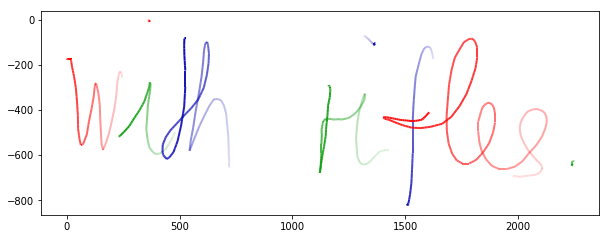

None
Grouth truth: 
with rifles . 
Prediction  : 
with rifles.
Character error rate: 0.14285714285714285
1/1 [==============================] - 0s 335ms/step


100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


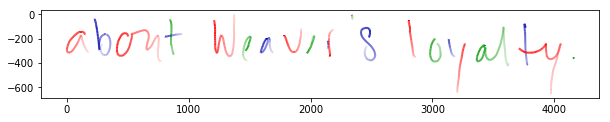

None
Grouth truth: 
about Weaver's loyalty . 
Prediction  : 
about Weaver's loyalty . 
Character error rate: 0.0
1/1 [==============================] - 0s 382ms/step


100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


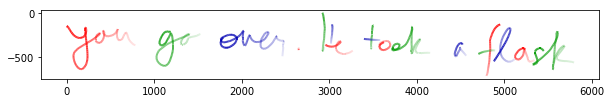

None
Grouth truth: 
you go over . He took a flask 
Prediction  : 
you gr ores . Ie took a flask 
Character error rate: 0.13333333333333333
1/1 [==============================] - 0s 372ms/step


100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


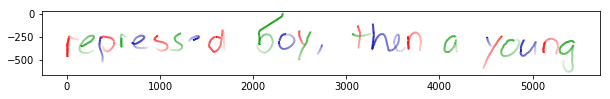

None
Grouth truth: 
repressed boy , then a young 
Prediction  : 
repressed boy , then a young 
Character error rate: 0.0
0.08466942757964428


In [5]:
# Random 10 samples
n=10
a_cer = 0

for _ in range(n):
    features, ground_truth, pointset = eval_seq.random_sample()
    pred = model.predict(features)[0]
    print(pointset.plot_strokes())
    print("Grouth truth: \n{}".format(ground_truth))
    print("Prediction  : \n{}".format(pred))
    cer = character_error_rate([ground_truth], [pred])
    print("Character error rate: {}".format(cer))
    a_cer += cer
    
a_cer = a_cer / n
print(a_cer)